In [48]:
import pandas as pd
from scipy.stats import ttest_ind
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [7]:
file_path = 'Global_Education.csv'
df = pd.read_csv(file_path, encoding='latin-1')


Global Education Enrollment

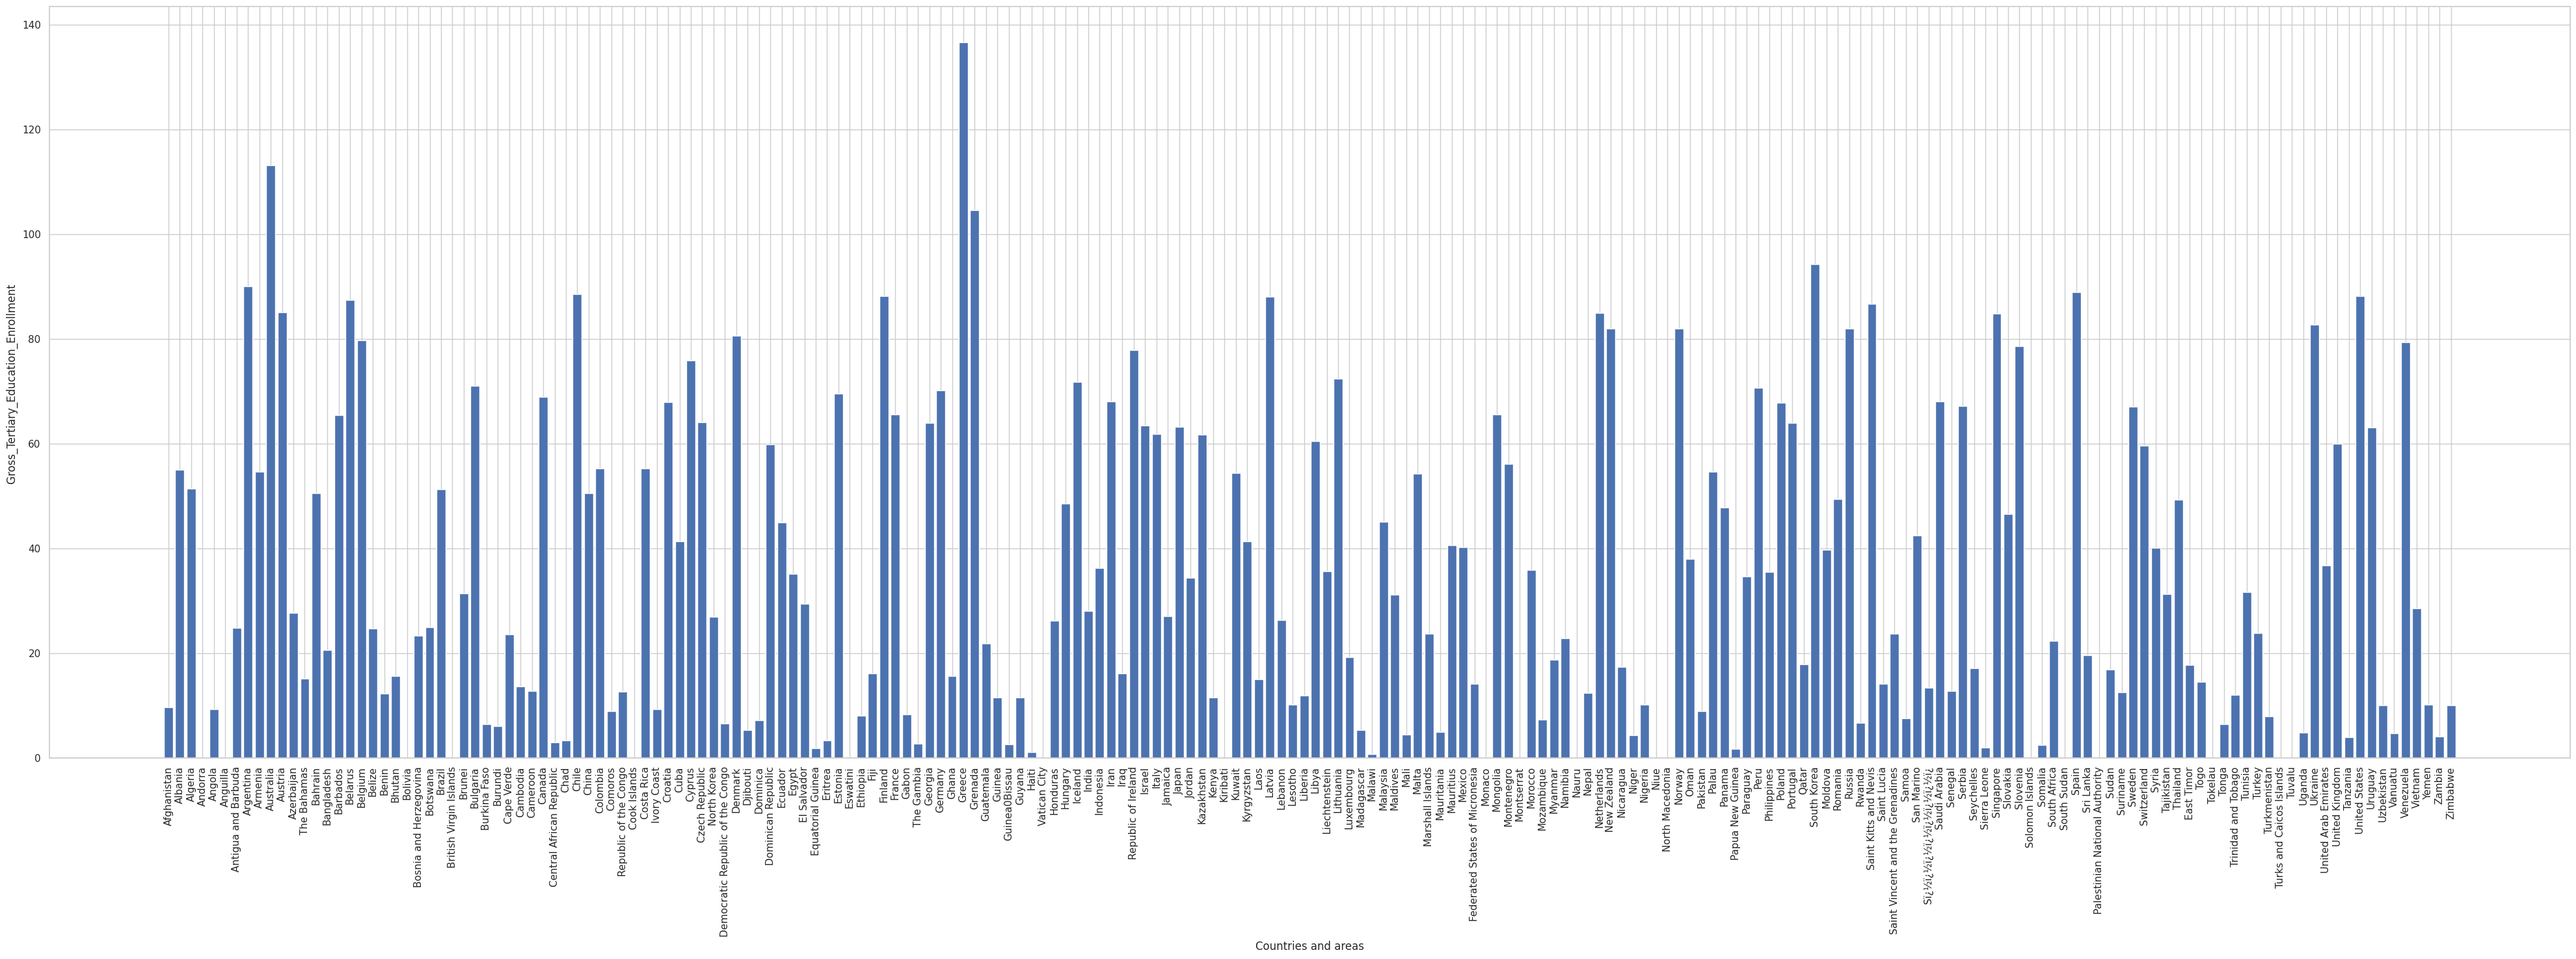

In [11]:
plt.figure(figsize=(50,15))
plt.bar(df['Countries and areas'],df['Gross_Tertiary_Education_Enrollment'])
plt.xticks(rotation=90)
plt.xlabel("Countries and areas")
plt.ylabel("Gross_Tertiary_Education_Enrollment ")
plt.show()

Completion Rates Over Different Education Levels in Different countries

In [8]:
completion_columns = ['Completion_Rate_Primary_Male', 'Completion_Rate_Primary_Female',
                      'Completion_Rate_Lower_Secondary_Male', 'Completion_Rate_Lower_Secondary_Female',
                      'Completion_Rate_Upper_Secondary_Male', 'Completion_Rate_Upper_Secondary_Female']
fig = px.line(df, x='Countries and areas', y=completion_columns,
              title='Completion Rates Over Different Education Levels')
fig.update_layout(xaxis_tickangle=-45)
fig.show()

Education Rate of Males and Females upto Higher Secondary by Countries

In [35]:
fig=px.bar(df,x='Countries and areas',y=['Completion_Rate_Upper_Secondary_Male', 'Completion_Rate_Upper_Secondary_Female'],title='Education Rate of Males and Females upto Higher Secondary by Countries')
fig.update_layout(xaxis_tickangle=-40,height=500)
fig.show()

Out of school at Primary Education

In [27]:
fig=px.bar(df,x='Countries and areas',y=['OOSR_Primary_Age_Male', 'OOSR_Primary_Age_Female'],title='Out Of Primary Schools Rates')
fig.update_layout(xaxis_tickangle=-40,height=500)
fig.show()

Out of Secondary Education

In [29]:
fig=px.bar(df,x='Countries and areas',y=['OOSR_Upper_Secondary_Age_Male', 'OOSR_Upper_Secondary_Age_Female'],title='Out Of School Secondary Rates ')
fig.update_layout(xaxis_tickangle=-40,height=500)
fig.show()

T-Test of Completion of Male and Female of Higher Secondary Education

In [33]:
male_completion = df['Completion_Rate_Upper_Secondary_Male']
female_completion = df['Completion_Rate_Upper_Secondary_Female']
t_statistic, p_value = ttest_ind(male_completion, female_completion)

print(f'T-Statistic: {t_statistic}')
print(f'P-Value: {p_value}')

alpha = 0.05
if p_value < alpha:
    print('The difference is statistically significant.')
else:
    print('The difference is not statistically significant.')

T-Statistic: -0.1312743507842733
P-Value: 0.8956239525186745
The difference is not statistically significant.


Completion of Higher Secondary of Male VS Unemployment rate

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(-20.0, 0, '−20'),
  Text(0.0, 0, '0'),
  Text(20.0, 0, '20'),
  Text(40.0, 0, '40'),
  Text(60.0, 0, '60'),
  Text(80.0, 0, '80'),
  Text(100.0, 0, '100'),
  Text(120.0, 0, '120')])

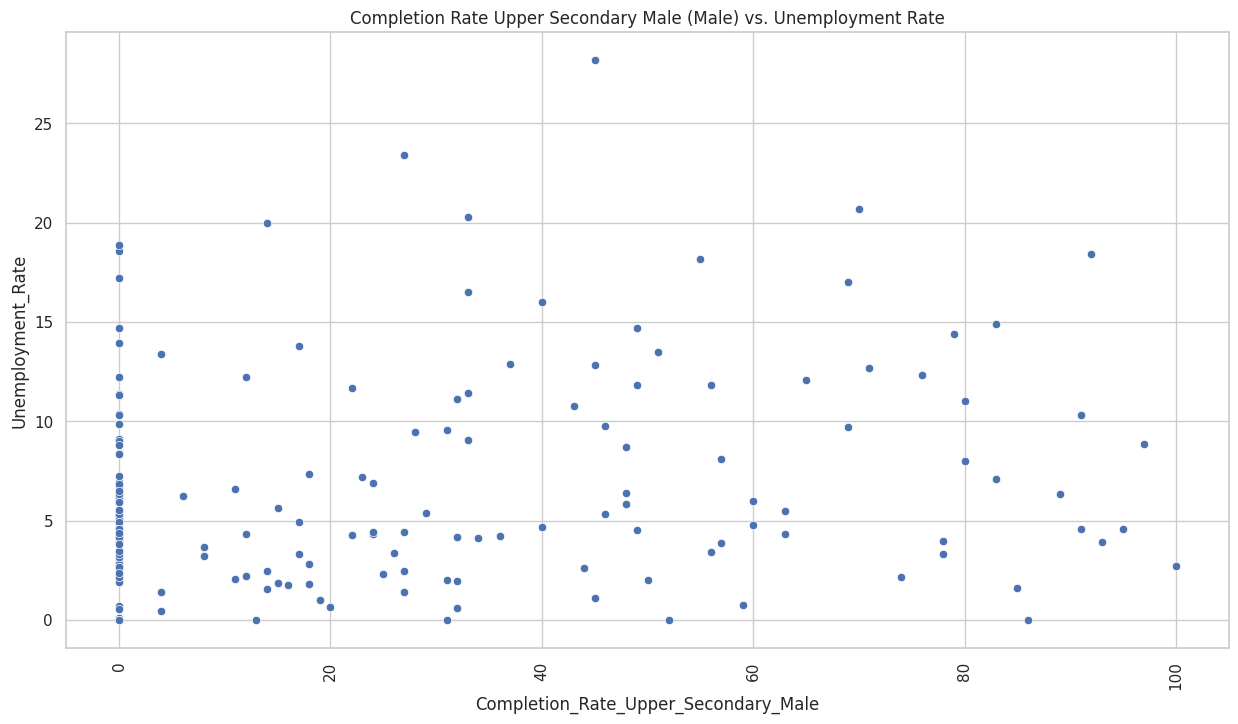

In [24]:
plt.figure(figsize=(15, 8))
sns.scatterplot(data=df, x='Completion_Rate_Upper_Secondary_Male', y='Unemployment_Rate')
plt.title('Completion Rate Upper Secondary Male (Male) vs. Unemployment Rate')
plt.xticks(rotation=90)

Completion of Higher Secondary of Female VS Unemployment rate

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(-20.0, 0, '−20'),
  Text(0.0, 0, '0'),
  Text(20.0, 0, '20'),
  Text(40.0, 0, '40'),
  Text(60.0, 0, '60'),
  Text(80.0, 0, '80'),
  Text(100.0, 0, '100'),
  Text(120.0, 0, '120')])

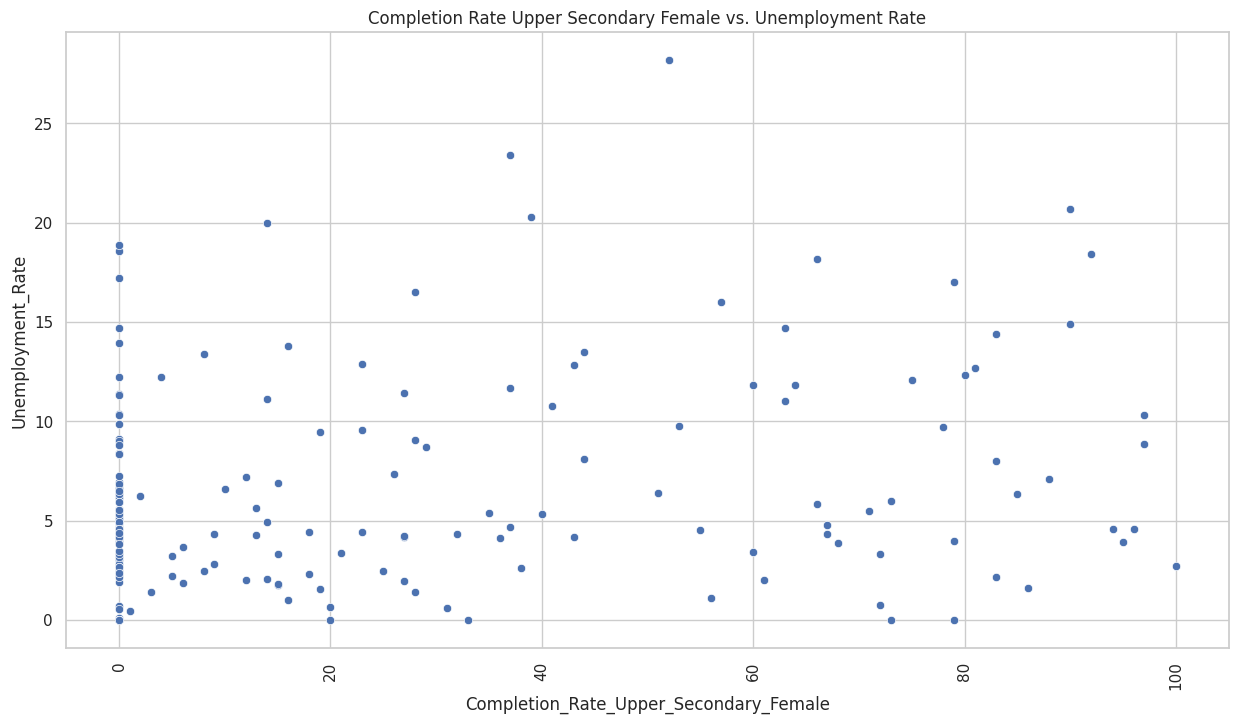

In [25]:
plt.figure(figsize=(15, 8))
sns.scatterplot(data=df, x='Completion_Rate_Upper_Secondary_Female', y='Unemployment_Rate')
plt.title('Completion Rate Upper Secondary Female vs. Unemployment Rate')
plt.xticks(rotation=90)


Unemployment Rate by Countries

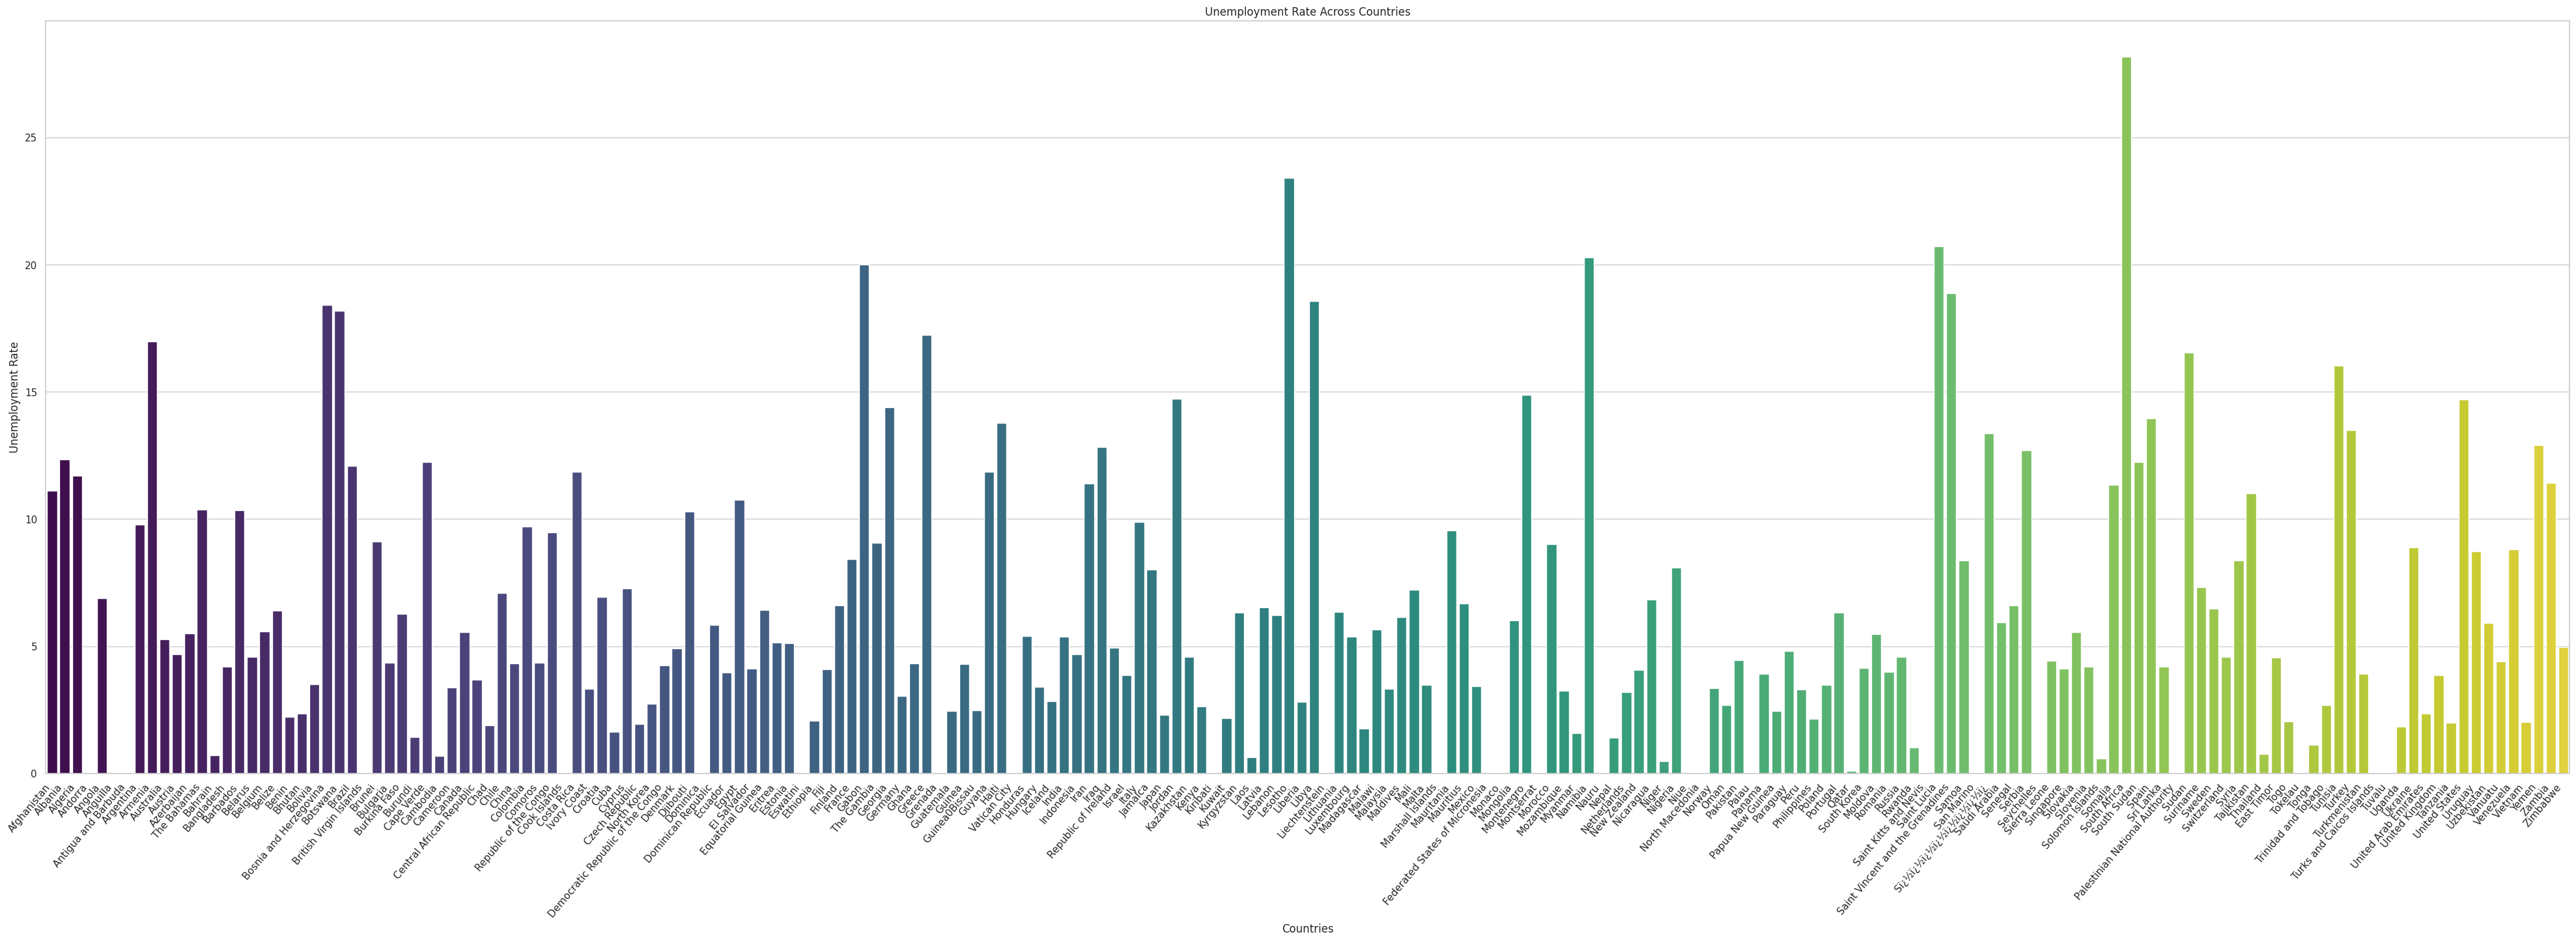

In [40]:
plt.figure(figsize=(50,15))
sns.barplot(x='Countries and areas', y='Unemployment_Rate', data=df, palette='viridis')
plt.title('Unemployment Rate Across Countries')
plt.xlabel('Countries')
plt.ylabel('Unemployment Rate')
plt.xticks(rotation=50, ha='right')

plt.show()

Education Rate Vs Unemplyment

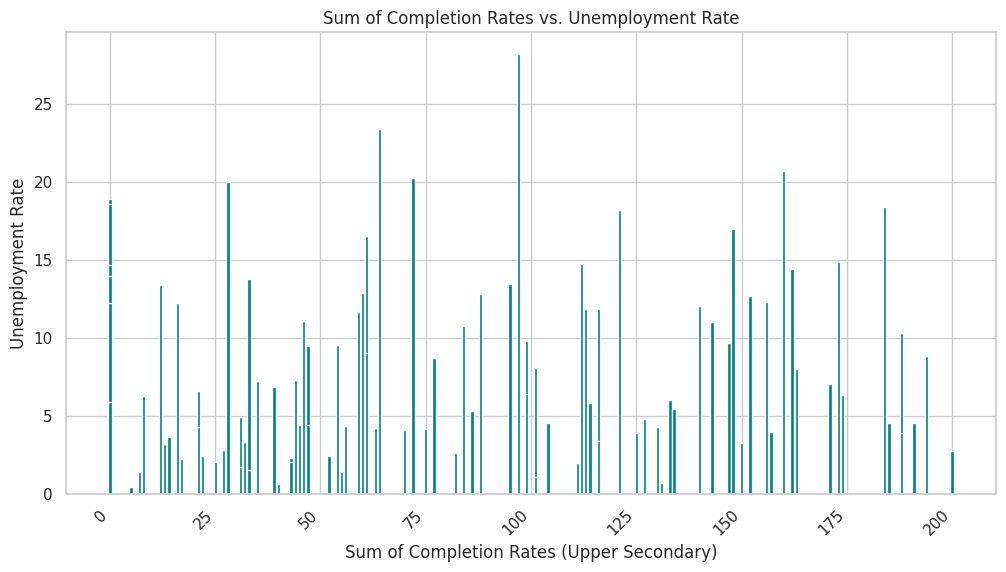

In [42]:
df['Total_Completion_Rate_Upper_Secondary'] = df['Completion_Rate_Upper_Secondary_Male'] + df['Completion_Rate_Upper_Secondary_Female']

df.sort_values(by='Total_Completion_Rate_Upper_Secondary', inplace=True)

plt.figure(figsize=(12, 6))
plt.bar(df['Total_Completion_Rate_Upper_Secondary'], df['Unemployment_Rate'], color='teal')
plt.title('Sum of Completion Rates vs. Unemployment Rate')
plt.xlabel('Sum of Completion Rates (Upper Secondary)')
plt.ylabel('Unemployment Rate')
plt.xticks(rotation=45, ha='right')

plt.show()

Relationship between Education and Unemployment

In [50]:
df['Total_Completion_Rate_Upper_Secondary'] = df['Completion_Rate_Upper_Secondary_Male'] + df['Completion_Rate_Upper_Secondary_Female']

X = sm.add_constant(df['Total_Completion_Rate_Upper_Secondary'])
y = df['Unemployment_Rate']

model = sm.OLS(y, X).fit()

coefficients_and_pvalues = pd.DataFrame({'Coefficient': model.params, 'P-value': model.pvalues})
print(coefficients_and_pvalues)

alpha = 0.05
significant_relationship = any(coefficients_and_pvalues['P-value'] < alpha)

if significant_relationship:
    print("\nThere is a statistically significant relationship between education and unemployment.")
else:
    print("\nThe relationship between education and unemployment is not statistically significant.")

                                       Coefficient       P-value
const                                     4.859201  1.721603e-21
Total_Completion_Rate_Upper_Secondary     0.024934  6.152914e-05

There is a statistically significant relationship between education and unemployment.
